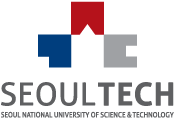

# Lab Session \# 04
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective

The objectives of this lab session are as follows:

1.   Introduce [Seaborn](https://seaborn.pydata.org/), a high level visualization library that is used for creating visualization plots that are useful for doing Exploratory Data Analysis (EDA).

2. Introduce the student to different data visualization techniques for helping to understand the characteristics and behavior of the target variable in predictive models.

3. Likewise, the techniques are also useful for understanding the relationship of the predictor variables in two ways, between themselves and with the target variable.

The analysis presented in this labsession is based on [Chapter 4](http://www.feat.engineering/exploratory-visualizations.html) of the **Feature book engineering and selection: A practical approach for predictive models**. You can check it out for a more detailed explanation of the analysis process.

## Importing libraries and uploading data to various pandas DataFrames


The libraries that we will import to start with are pandas and numpy for data handling, and matplotlib and seaborn for generating visualizations.

Data were obtained from [Chicago data portal](https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f).

The data needs some preprocessing, but that is not the point of this Lab Session, so I am including two extra files. The first is where the days used for the analysis are recorded, and the second are attributes created by the author of the book.

In [1]:
!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir data

In [4]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG', # chicago_train_data  https://drive.google.com/file/d/1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-', # train_days   https://drive.google.com/file/d/1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN', # extra data chicago https://drive.google.com/file/d/18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o', # chichago_gas_prices https://drive.google.com/file/d/13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX' # https://drive.google.com/file/d/1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX/view?usp=sharing
        ]
outputs = ['chicago_train_data.csv','train_days.csv' ,
           'extra_data_chicago.csv','chicago_gas_prices.csv',
           'lag_14_data.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG
To: /content/data/chicago_train_data.csv
100%|██████████| 38.2M/38.2M [00:01<00:00, 22.6MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-
To: /content/data/train_days.csv
100%|██████████| 107k/107k [00:00<00:00, 46.6MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN
To: /content/data/extra_data_chicago.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 15.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o
To: /content/data/chicago_gas_prices.csv
100%|██████████| 14.2k/14.2k [00:00<00:00, 5.40MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX
To: /content/data/lag_14_data.csv
100%|██████████| 4.25M/4.25M [00:00<00:00, 18.4MB/s]


In [5]:
df = pd.read_csv('data/chicago_train_data.csv', parse_dates=True, index_col=2)
train_days = pd.read_csv('data/train_days.csv',index_col=1, parse_dates=True)
extra_data = pd.read_csv('data/extra_data_chicago.csv',index_col=0, parse_dates=True)

In [6]:
df.head()

,station_id,stationname,daytype,rides
date,,,,
2017-12-22,41280,Jefferson Park,W,6104
2017-12-18,41000,Cermak-Chinatown,W,3636
2017-12-02,40280,Central-Lake,A,1270
2017-12-19,40140,Dempster-Skokie,W,1759
2017-12-03,40690,Dempster,U,499


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036763 entries, 2017-12-22 to 2020-11-30
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1036763 non-null  int64 
 1   stationname  1036763 non-null  object
 2   daytype      1036763 non-null  object
 3   rides        1036763 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 39.5+ MB


In [8]:
df.describe()

,station_id,rides
count,1.036763e+06,1.036763e+06
mean,4.076441e+04,3.226514e+03
std,4.478133e+02,3.196655e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,1.051000e+03
50%,4.076000e+04,2.198000e+03
75%,4.115000e+04,4.243000e+03
max,4.170000e+04,3.632300e+04


In [9]:
train_days

,Unnamed: 0
date,
2001-01-22,1
2001-01-23,2
2001-01-24,3
2001-01-25,4
2001-01-26,5
...,...
2016-08-24,5694
2016-08-25,5695
2016-08-26,5696


In [10]:
df.loc[train_days.index]

,station_id,stationname,daytype,rides
date,,,,
2001-01-22,40440,California-Cermak,W,832
2001-01-22,40450,95th/Dan Ryan,W,14731
2001-01-22,40040,Quincy/Wells,W,8258
2001-01-22,40610,Ridgeland,W,1222
2001-01-22,41420,Addison-North Main,W,4811
...,...,...,...,...
2016-08-28,40040,Quincy/Wells,U,1302
2016-08-28,40210,Damen-Cermak,U,692
2016-08-28,40680,Adams/Wabash,U,3343


In [11]:
train_df = df.loc[train_days.index]
train_df

,station_id,stationname,daytype,rides
date,,,,
2001-01-22,40440,California-Cermak,W,832
2001-01-22,40450,95th/Dan Ryan,W,14731
2001-01-22,40040,Quincy/Wells,W,8258
2001-01-22,40610,Ridgeland,W,1222
2001-01-22,41420,Addison-North Main,W,4811
...,...,...,...,...
2016-08-28,40040,Quincy/Wells,U,1302
2016-08-28,40210,Damen-Cermak,U,692
2016-08-28,40680,Adams/Wabash,U,3343


In [12]:
train_df.index.year.unique()

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016],
      dtype='int32', name='date')

In [13]:
train_df_c1 = train_df[train_df['stationname'] == 'Clark/Lake'].copy()
train_df_c1

,station_id,stationname,daytype,rides
date,,,,
2001-01-22,40380,Clark/Lake,W,15732
2001-01-23,40380,Clark/Lake,W,15762
2001-01-24,40380,Clark/Lake,W,15872
2001-01-25,40380,Clark/Lake,W,15874
2001-01-26,40380,Clark/Lake,W,15423
...,...,...,...,...
2016-08-24,40380,Clark/Lake,W,20651
2016-08-25,40380,Clark/Lake,W,21282
2016-08-26,40380,Clark/Lake,W,20528


In [14]:
train_df_c1['rides x1000'] = train_df_c1['rides']/1000
train_df_c1['part_of_the_week'] = train_df_c1.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend') # Weekday, Weekend 구분
train_df_c1.head()

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week
date,,,,,,
2001-01-22,40380,Clark/Lake,W,15732,15.732,Weekday
2001-01-23,40380,Clark/Lake,W,15762,15.762,Weekday
2001-01-24,40380,Clark/Lake,W,15872,15.872,Weekday
2001-01-25,40380,Clark/Lake,W,15874,15.874,Weekday
2001-01-26,40380,Clark/Lake,W,15423,15.423,Weekday


In [15]:
train_df_c1.index.duplicated()

array([False, False, False, ..., False, False, False])

In [16]:
train_df_c1.index.duplicated().sum()

1

In [17]:
train_df_c1[train_df_c1.index.duplicated()]

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week
date,,,,,,
2011-07-03,40380,Clark/Lake,U,5573,5.573,Weekend


In [18]:
train_df_c1.loc['2011-07-03']

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week
date,,,,,,
2011-07-03,40380,Clark/Lake,U,5574,5.574,Weekend
2011-07-03,40380,Clark/Lake,U,5573,5.573,Weekend


In [19]:
train_df_c1 = train_df_c1[~train_df_c1.index.duplicated(keep='first')]

In [20]:
train_df_c1.index.duplicated().sum()

0

# Visualization of continuous variables

## Box Plots, Violin Plots, Histograms and Density Plots

In [21]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes

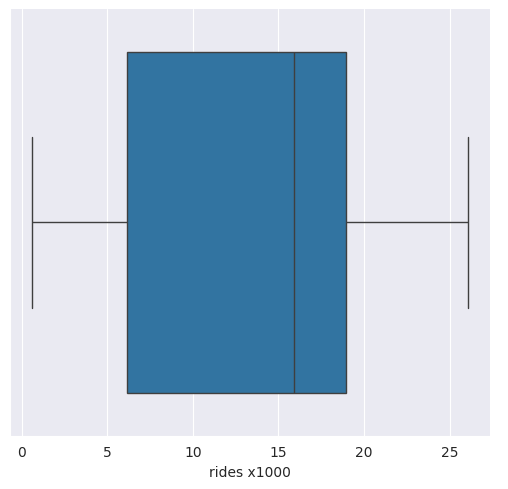

In [22]:
# Box Plots
sns.catplot(data=train_df_c1, x='rides x1000', kind='box')

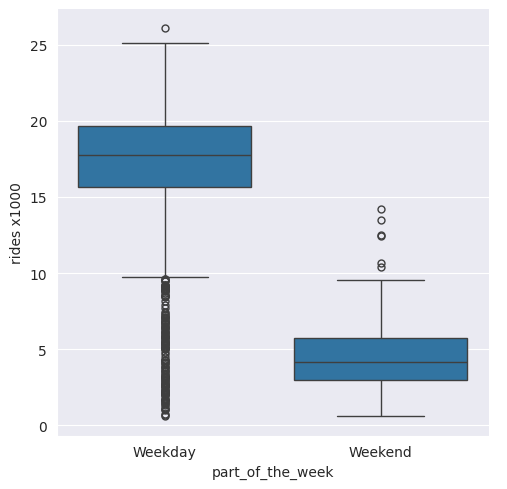

In [23]:
sns.catplot(data=train_df_c1, x='part_of_the_week', y='rides x1000', kind='box')

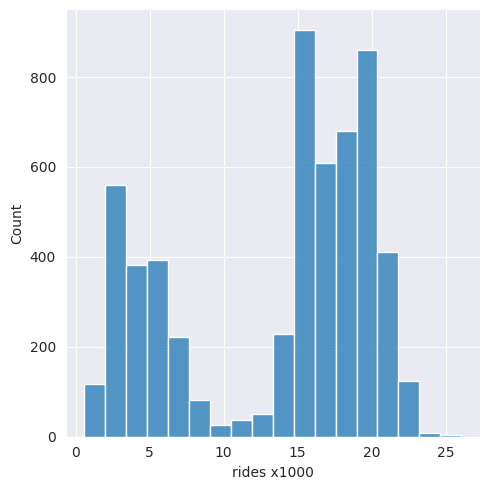

In [24]:
# Histograms
sns.displot(data=train_df_c1, x='rides x1000')

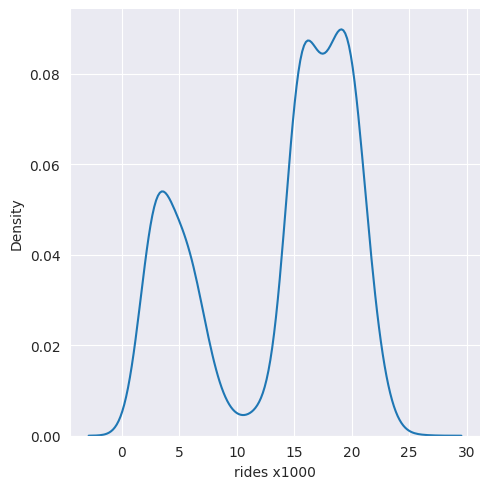

In [25]:
# Density Plot
sns.displot(data=train_df_c1, x='rides x1000', kind='kde')

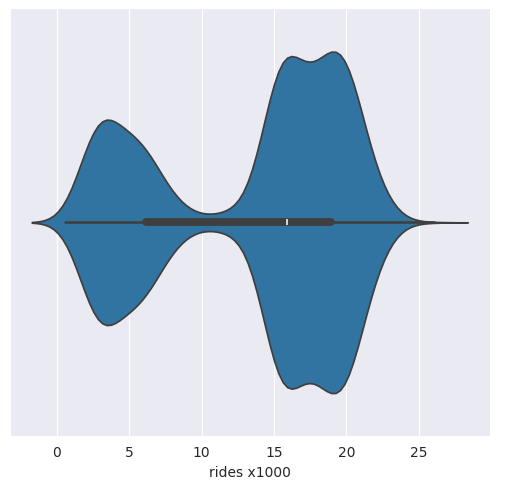

In [26]:
# Violin Plot
sns.catplot(data=train_df_c1, x='rides x1000', kind='violin')

<Axes: xlabel='rides x1000'>

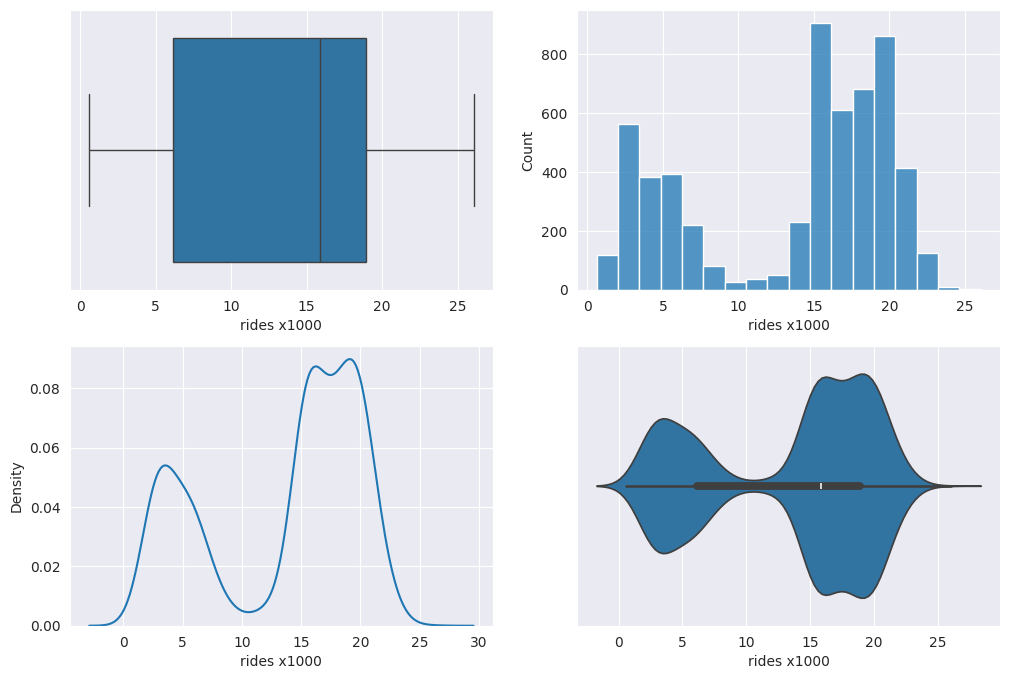

In [27]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid

sns.boxplot(data=train_df_c1, x='rides x1000', ax=axs[0,0])
sns.histplot(data=train_df_c1, x='rides x1000', ax=axs[0,1])
sns.kdeplot(data=train_df_c1, x='rides x1000',ax=axs[1,0])
sns.violinplot(data=train_df_c1, x='rides x1000', ax=axs[1,1])

### Increasing visualizations with facets, colors and shapes

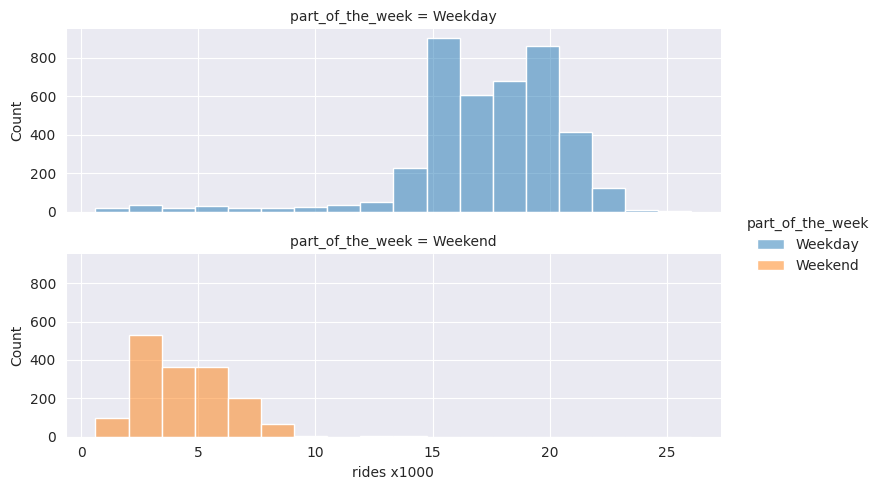

In [28]:
sns.displot(data=train_df_c1,
            x='rides x1000',
            hue='part_of_the_week',
            row='part_of_the_week',
            height=2.5,
            aspect=3)

## Scatter plots



In [29]:
train_df_c1['two_week_lag_rides'] = train_df_c1['rides'].shift(periods=14, fill_value=0)
train_df_c1['two_week_lag_rides_x1000'] = train_df_c1['two_week_lag_rides']/1000

<ipython-input-29-ea0635b70388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_c1['two_week_lag_rides'] = train_df_c1['rides'].shift(periods=14, fill_value=0)
<ipython-input-29-ea0635b70388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_c1['two_week_lag_rides_x1000'] = train_df_c1['two_week_lag_rides']/1000


In [30]:
train_df_c1.head(16)

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week,two_week_lag_rides,two_week_lag_rides_x1000
date,,,,,,,,
2001-01-22,40380,Clark/Lake,W,15732,15.732,Weekday,0,0.000
2001-01-23,40380,Clark/Lake,W,15762,15.762,Weekday,0,0.000
2001-01-24,40380,Clark/Lake,W,15872,15.872,Weekday,0,0.000
2001-01-25,40380,Clark/Lake,W,15874,15.874,Weekday,0,0.000
2001-01-26,40380,Clark/Lake,W,15423,15.423,Weekday,0,0.000
2001-01-27,40380,Clark/Lake,A,2425,2.425,Weekend,0,0.000
2001-01-28,40380,Clark/Lake,U,1467,1.467,Weekend,0,0.000
2001-01-29,40380,Clark/Lake,W,15511,15.511,Weekday,0,0.000
2001-01-30,40380,Clark/Lake,W,15927,15.927,Weekday,0,0.000


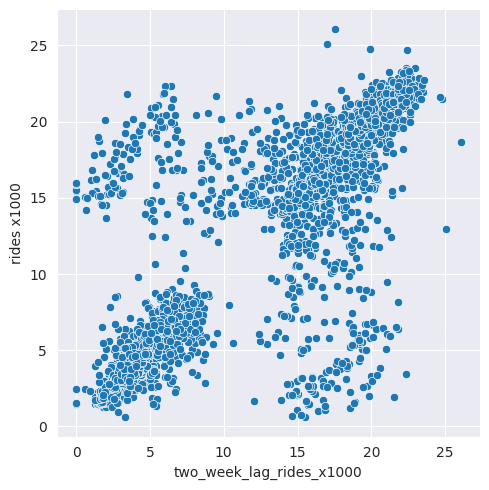

In [31]:
sns.relplot(data=train_df_c1, x='two_week_lag_rides_x1000', y='rides x1000')

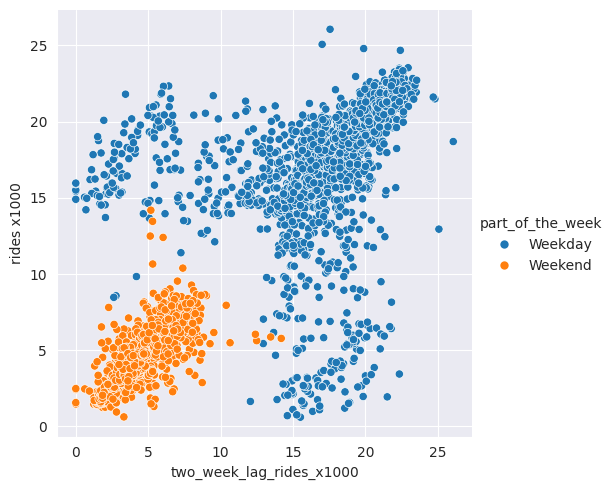

In [32]:
sns.relplot(data=train_df_c1, x='two_week_lag_rides_x1000', y='rides x1000', hue='part_of_the_week')

## Heatmaps

We create an indicator variable for weekday values that are less than 10,000 passengers

In [33]:
train_df_c1['less_than_10k'] = (train_df_c1['rides']<10000).astype(int)
train_df_c1['less_than_10k'] = (train_df_c1['less_than_10k']==1).astype(int)
train_df_c1['month_name'] = train_df_c1.index.month_name()
train_df_c1['day'] = train_df_c1.index.day
train_df_c1['month'] = train_df_c1.index.month
train_df_c1['month_day'] = train_df_c1['month'].apply(lambda x: f"{x:02d}") + '-' + train_df_c1['day'].apply(lambda x: f"{x:02d}")
train_df_c1['year'] = train_df_c1.index.year
train_df_c1.head()

<ipython-input-33-944cfcd9e31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_c1['less_than_10k'] = (train_df_c1['rides']<10000).astype(int)
<ipython-input-33-944cfcd9e31d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_c1['less_than_10k'] = (train_df_c1['less_than_10k']==1).astype(int)
<ipython-input-33-944cfcd9e31d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week,two_week_lag_rides,two_week_lag_rides_x1000,less_than_10k,month_name,day,month,month_day,year
date,,,,,,,,,,,,,,
2001-01-22,40380,Clark/Lake,W,15732,15.732,Weekday,0,0.0,0,January,22,1,01-22,2001
2001-01-23,40380,Clark/Lake,W,15762,15.762,Weekday,0,0.0,0,January,23,1,01-23,2001
2001-01-24,40380,Clark/Lake,W,15872,15.872,Weekday,0,0.0,0,January,24,1,01-24,2001
2001-01-25,40380,Clark/Lake,W,15874,15.874,Weekday,0,0.0,0,January,25,1,01-25,2001
2001-01-26,40380,Clark/Lake,W,15423,15.423,Weekday,0,0.0,0,January,26,1,01-26,2001


How can we create the source table for creating a heatmap?

In [34]:
heat_map_data = train_df_c1[train_df_c1['part_of_the_week'] == 'Weekend'].pivot_table(index='month_day', columns='year', values='less_than_10k', aggfunc='sum').fillna(0)
heat_map_data.head()

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month_day,,,,,,,,,,,,,,,,
01-01,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
01-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
01-03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
01-04,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
01-05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<Axes: xlabel='year', ylabel='month_day'>

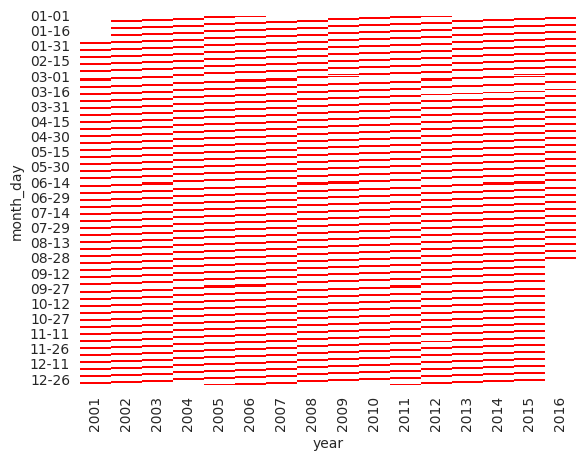

In [35]:
sns.heatmap(data=heat_map_data, cmap=['white', 'red'], cbar=False, yticklabels=15)

Now that we know the effect of holidays in the dataset, we can remove those days.

For that we use the **extra\_data** dataset that we loaded at the beginning.

In [36]:
common_holidays = ['USNewYearsDay', 'Jan02_Mon_Fri', 'USMLKingsBirthday',
    'USPresidentsDay', 'USMemorialDay', 'USIndependenceDay',
    'Jul03_Mon_Fri', 'Jul05_Mon_Fri', 'USLaborDay', 'USThanksgivingDay',
    'Day_after_Thx', 'ChristmasEve', 'USChristmasDay', 'Dec26_wkday',
    'Dec31_Mon_Fri']

In [37]:
extra_data.head(3)

,Advent1st,Advent2nd,Advent3rd,Advent4th,AllSaints,AllSouls,Annunciation,Ascension,AshWednesday,AssumptionOfMary,...,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,l14_gas_price,l30_unemployment_rate
date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.516,NaN
2001-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.516,NaN
2001-01-24,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1.516,NaN


In [38]:
dates_with_holiday = (extra_data[common_holidays]==1).any(axis=1)

In [39]:
train_df_c1['holiday'] = dates_with_holiday.astype(int)

<ipython-input-39-3786801d5f38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_c1['holiday'] = dates_with_holiday.astype(int)


In [40]:
train_df_c1['two_week_lag_holiday'] = train_df_c1['holiday'].shift(periods=14, fill_value=0)

<ipython-input-40-574869c7e0ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_c1['two_week_lag_holiday'] = train_df_c1['holiday'].shift(periods=14, fill_value=0)


We filter the data set with days that are not holidays and that do not have a holiday with a delay of two weeks.

In [41]:
train_df_c1_no_holiday = train_df_c1[(train_df_c1['holiday']==0) & (train_df_c1['two_week_lag_holiday']==0)]
train_df_c1_no_holiday

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week,two_week_lag_rides,two_week_lag_rides_x1000,less_than_10k,month_name,day,month,month_day,year,holiday,two_week_lag_holiday
date,,,,,,,,,,,,,,,,
2001-01-22,40380,Clark/Lake,W,15732,15.732,Weekday,0,0.000,0,January,22,1,01-22,2001,0,0
2001-01-23,40380,Clark/Lake,W,15762,15.762,Weekday,0,0.000,0,January,23,1,01-23,2001,0,0
2001-01-24,40380,Clark/Lake,W,15872,15.872,Weekday,0,0.000,0,January,24,1,01-24,2001,0,0
2001-01-25,40380,Clark/Lake,W,15874,15.874,Weekday,0,0.000,0,January,25,1,01-25,2001,0,0
2001-01-26,40380,Clark/Lake,W,15423,15.423,Weekday,0,0.000,0,January,26,1,01-26,2001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,40380,Clark/Lake,W,20651,20.651,Weekday,21788,21.788,0,August,24,8,08-24,2016,0,0
2016-08-25,40380,Clark/Lake,W,21282,21.282,Weekday,21471,21.471,0,August,25,8,08-25,2016,0,0
2016-08-26,40380,Clark/Lake,W,20528,20.528,Weekday,19606,19.606,0,August,26,8,08-26,2016,0,0


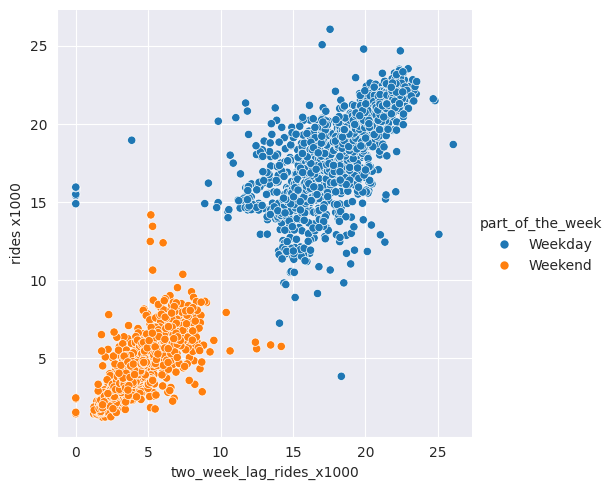

In [42]:
sns.relplot(data=train_df_c1_no_holiday, x='two_week_lag_rides_x1000', y='rides x1000', hue='part_of_the_week')

## Correlation Matrix Plots

We add the characteristics we created for our data subset containing only the Clark / Lake station.

In [43]:
df = df.sort_index()

In [44]:
df['part_of_the_week']=df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend') # find if it is weekday or weekend
df

,station_id,stationname,daytype,rides,part_of_the_week
date,,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457,Weekday
2001-01-01,41130,Halsted-Orange,U,306,Weekday
2001-01-01,40350,UIC-Halsted,U,273,Weekday
2001-01-01,40450,95th/Dan Ryan,U,3948,Weekday
2001-01-01,40740,Western-Cermak,U,0,Weekday
...,...,...,...,...,...
2020-11-30,41020,Logan Square,W,1009,Weekday
2020-11-30,40090,Damen-Brown,W,359,Weekday
2020-11-30,41380,Bryn Mawr,W,920,Weekday


In [45]:
df['holiday'] = False

In [46]:
df.head()

,station_id,stationname,daytype,rides,part_of_the_week,holiday
date,,,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457,Weekday,False
2001-01-01,41130,Halsted-Orange,U,306,Weekday,False
2001-01-01,40350,UIC-Halsted,U,273,Weekday,False
2001-01-01,40450,95th/Dan Ryan,U,3948,Weekday,False
2001-01-01,40740,Western-Cermak,U,0,Weekday,False


In [47]:
df.groupby('stationname')['rides'].shift(periods=14, fill_value=0)

,rides
date,
2001-01-01,0
2001-01-01,0
2001-01-01,0
2001-01-01,0
2001-01-01,0
...,...
2020-11-30,1134
2020-11-30,410
2020-11-30,924


In [48]:
df['two_week_lag_rides'] = df.groupby('stationname')['rides'].shift(periods=14, fill_value=0)
df

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457,Weekday,False,0
2001-01-01,41130,Halsted-Orange,U,306,Weekday,False,0
2001-01-01,40350,UIC-Halsted,U,273,Weekday,False,0
2001-01-01,40450,95th/Dan Ryan,U,3948,Weekday,False,0
2001-01-01,40740,Western-Cermak,U,0,Weekday,False,0
...,...,...,...,...,...,...,...
2020-11-30,41020,Logan Square,W,1009,Weekday,False,1134
2020-11-30,40090,Damen-Brown,W,359,Weekday,False,410
2020-11-30,41380,Bryn Mawr,W,920,Weekday,False,924


In [49]:
df[df['stationname'] == 'Jefferson Park']

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,
2001-01-01,41280,Jefferson Park,U,1302,Weekday,False,0
2001-01-02,41280,Jefferson Park,W,5812,Weekday,False,0
2001-01-03,41280,Jefferson Park,W,6171,Weekday,False,0
2001-01-04,41280,Jefferson Park,W,6385,Weekday,False,0
2001-01-05,41280,Jefferson Park,W,6334,Weekday,False,0
...,...,...,...,...,...,...,...
2020-11-26,41280,Jefferson Park,U,746,Weekday,False,2128
2020-11-27,41280,Jefferson Park,W,1354,Weekday,False,2073
2020-11-28,41280,Jefferson Park,A,1246,Weekend,False,1258


In [50]:
df.loc[df.index.intersection(dates_with_holiday[dates_with_holiday].index), 'holiday']=True #setting the holidays to true

After this, we take only the records corresponding to the year 2016

In [51]:
df.loc['2016']

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,
2016-01-01,40340,Berwyn,U,1703,Weekday,True,3593
2016-01-01,41040,Kedzie-Cermak,U,501,Weekday,True,1149
2016-01-01,41410,Chicago/Milwaukee,U,1923,Weekday,True,4366
2016-01-01,41510,Morgan-Lake,U,1007,Weekday,True,2837
2016-01-01,41480,Western-Brown,U,1602,Weekday,True,4181
...,...,...,...,...,...,...,...
2016-12-31,40630,Clark/Division,A,4965,Weekend,False,6128
2016-12-31,40570,California/Milwaukee,A,2782,Weekend,False,2823
2016-12-31,40150,Pulaski-Cermak,A,736,Weekend,False,718


In [52]:
all_2016 = df.loc['2016'].copy()
all_2016

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,
2016-01-01,40340,Berwyn,U,1703,Weekday,True,3593
2016-01-01,41040,Kedzie-Cermak,U,501,Weekday,True,1149
2016-01-01,41410,Chicago/Milwaukee,U,1923,Weekday,True,4366
2016-01-01,41510,Morgan-Lake,U,1007,Weekday,True,2837
2016-01-01,41480,Western-Brown,U,1602,Weekday,True,4181
...,...,...,...,...,...,...,...
2016-12-31,40630,Clark/Division,A,4965,Weekend,False,6128
2016-12-31,40570,California/Milwaukee,A,2782,Weekend,False,2823
2016-12-31,40150,Pulaski-Cermak,A,736,Weekend,False,718


In [53]:
clustermap_data = all_2016[(all_2016['part_of_the_week']=='Weekday')&(all_2016['holiday']==False)]

In [54]:
clustermap_data.pivot(columns='stationname', values='two_week_lag_rides')

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,UIC-Halsted,Washington/Dearborn,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,1688,1255,2717,975,2780,1230,920,2113,2548,4949,...,2465,12979,7023,2593,3631,1081,1409,3537,4787,4549
2016-01-05,1744,1324,2893,1008,2883,1243,1035,2128,2617,5134,...,2513,14158,6883,2695,3906,1067,1461,3560,5016,4506
2016-01-06,1574,1191,2734,954,2767,1249,940,2015,2449,4909,...,1983,11290,5403,2046,3274,1012,1334,3327,4342,4203
2016-01-07,974,963,1711,743,2490,1105,865,1403,2322,4394,...,1038,6893,2466,950,2014,692,996,2257,2315,3328
2016-01-08,430,509,648,355,1225,521,417,633,1505,2666,...,399,2084,388,227,771,329,574,801,861,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,1697,1493,3011,964,2869,1107,916,1937,3021,5082,...,3441,13133,8353,3159,3934,1081,1617,3662,5408,5547
2016-12-27,1777,1478,3062,965,2906,1072,909,2020,2923,5136,...,3316,13140,8444,3190,4172,1162,1573,3852,5234,5529
2016-12-28,1641,1343,2941,955,2845,1061,910,1913,2761,4801,...,3143,12889,8124,2989,3851,1093,1503,3615,5194,5398


In [55]:
rides_by_station_pivot = clustermap_data.pivot(columns='stationname', values='two_week_lag_rides')
rides_by_station_pivot

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,UIC-Halsted,Washington/Dearborn,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,1688,1255,2717,975,2780,1230,920,2113,2548,4949,...,2465,12979,7023,2593,3631,1081,1409,3537,4787,4549
2016-01-05,1744,1324,2893,1008,2883,1243,1035,2128,2617,5134,...,2513,14158,6883,2695,3906,1067,1461,3560,5016,4506
2016-01-06,1574,1191,2734,954,2767,1249,940,2015,2449,4909,...,1983,11290,5403,2046,3274,1012,1334,3327,4342,4203
2016-01-07,974,963,1711,743,2490,1105,865,1403,2322,4394,...,1038,6893,2466,950,2014,692,996,2257,2315,3328
2016-01-08,430,509,648,355,1225,521,417,633,1505,2666,...,399,2084,388,227,771,329,574,801,861,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,1697,1493,3011,964,2869,1107,916,1937,3021,5082,...,3441,13133,8353,3159,3934,1081,1617,3662,5408,5547
2016-12-27,1777,1478,3062,965,2906,1072,909,2020,2923,5136,...,3316,13140,8444,3190,4172,1162,1573,3852,5234,5529
2016-12-28,1641,1343,2941,955,2845,1061,910,1913,2761,4801,...,3143,12889,8124,2989,3851,1093,1503,3615,5194,5398


In [56]:
corr_matrix = rides_by_station_pivot.corr() # 각 station별 correlationship 계산
corr_matrix

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,UIC-Halsted,Washington/Dearborn,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
stationname,,,,,,,,,,,,,,,,,,,,,
18th,1.000000,0.746260,0.837868,0.823815,0.833441,0.789317,0.805291,0.829719,0.697257,0.831921,...,0.475596,0.764191,0.744184,0.813960,0.856313,0.893303,0.782870,0.831220,0.839593,0.696967
35-Bronzeville-IIT,0.746260,1.000000,0.831162,0.745412,0.779610,0.690764,0.678336,0.709292,0.718681,0.772846,...,0.779258,0.663738,0.684751,0.780176,0.763490,0.778056,0.834150,0.785802,0.790710,0.775263
35th/Archer,0.837868,0.831162,1.000000,0.883681,0.899941,0.794399,0.838454,0.837018,0.838660,0.895712,...,0.628014,0.854874,0.871707,0.919261,0.928704,0.907336,0.909193,0.973879,0.936491,0.902590
43rd,0.823815,0.745412,0.883681,1.000000,0.912230,0.845524,0.898093,0.827366,0.780431,0.904972,...,0.433391,0.846472,0.846001,0.871859,0.899027,0.875760,0.825582,0.917575,0.884763,0.729763
47th-Dan Ryan,0.833441,0.779610,0.899941,0.912230,1.000000,0.876650,0.912572,0.789638,0.823195,0.945956,...,0.460555,0.805767,0.785037,0.850456,0.899491,0.887600,0.884374,0.905868,0.880815,0.756895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western-Cermak,0.893303,0.778056,0.907336,0.875760,0.887600,0.811785,0.840227,0.880796,0.771323,0.894092,...,0.517056,0.846128,0.846266,0.899565,0.910435,1.000000,0.874032,0.918126,0.903482,0.771738
Western-Forest Park,0.782870,0.834150,0.909193,0.825582,0.884374,0.768993,0.792614,0.724618,0.847306,0.878985,...,0.657485,0.725689,0.766546,0.851526,0.838106,0.874032,1.000000,0.887950,0.859926,0.841626
Western-Orange,0.831220,0.785802,0.973879,0.917575,0.905868,0.806343,0.868545,0.848390,0.829698,0.894825,...,0.541438,0.888686,0.909799,0.934610,0.943775,0.918126,0.887950,1.000000,0.943551,0.871268


We take the data only for weekdays and that are not holidays

We create the pivot table where the rows are the days of the year 2016, and the columns are the seasons. Each cell in the data set represents the number of passengers for a specific station and day.

We create the correlation matrix, and then we generate the graph. Which also includes a clustering function for the stations. That is, the stations with the highest positive correlation are contiguous and the stations with the highest negative correlation are far apart. This is represented with a dendrogram on the axes of the graph.

In [57]:
corr_matrix.loc['O\'Hare Airport','UIC-Halsted']

-0.0912267447650854

In [58]:
corr_matrix.loc['Harlem-Lake','Quincy/Wells']

0.8066930635212592

<Axes: xlabel='stationname', ylabel='stationname'>

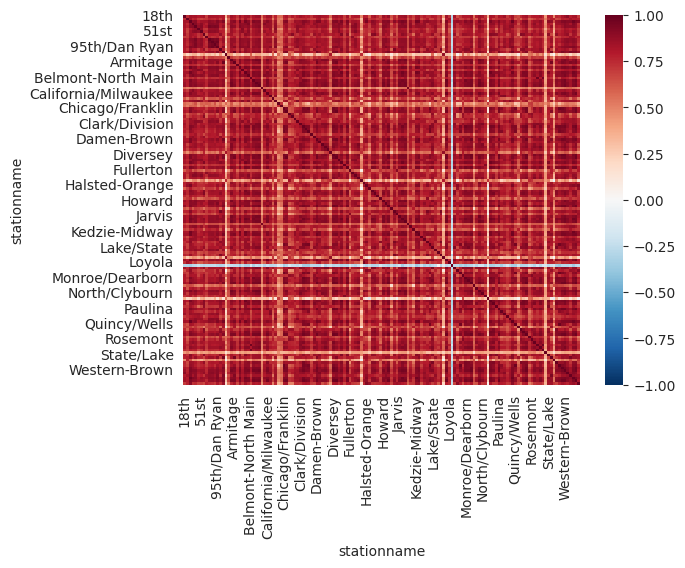

In [59]:
sns.heatmap(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



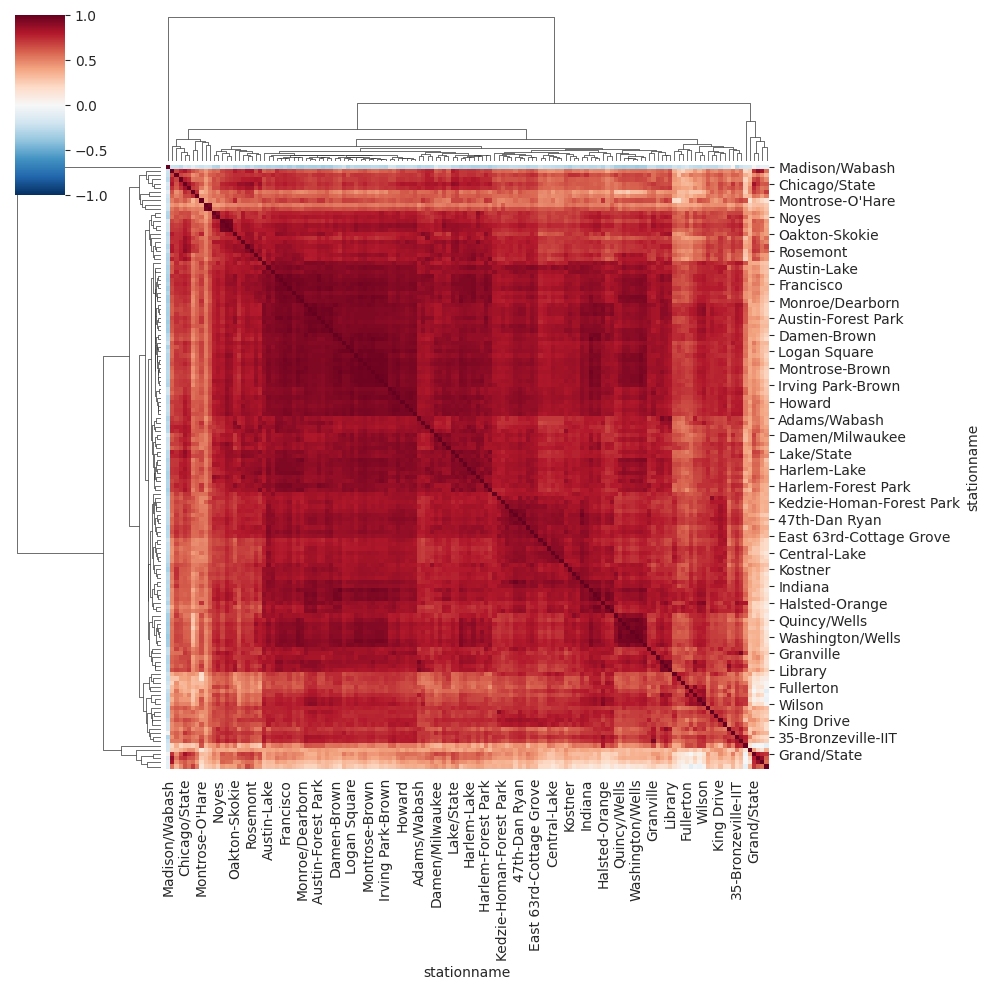

In [137]:
sns.clustermap(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)

## Line charts

In [67]:
train_df_c1

,station_id,stationname,daytype,rides,rides x1000,part_of_the_week,two_week_lag_rides,two_week_lag_rides_x1000,less_than_10k,month_name,day,month,month_day,year,holiday,two_week_lag_holiday
date,,,,,,,,,,,,,,,,
2001-01-22,40380,Clark/Lake,W,15732,15.732,Weekday,0,0.000,0,January,22,1,01-22,2001,0,0
2001-01-23,40380,Clark/Lake,W,15762,15.762,Weekday,0,0.000,0,January,23,1,01-23,2001,0,0
2001-01-24,40380,Clark/Lake,W,15872,15.872,Weekday,0,0.000,0,January,24,1,01-24,2001,0,0
2001-01-25,40380,Clark/Lake,W,15874,15.874,Weekday,0,0.000,0,January,25,1,01-25,2001,0,0
2001-01-26,40380,Clark/Lake,W,15423,15.423,Weekday,0,0.000,0,January,26,1,01-26,2001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,40380,Clark/Lake,W,20651,20.651,Weekday,21788,21.788,0,August,24,8,08-24,2016,0,0
2016-08-25,40380,Clark/Lake,W,21282,21.282,Weekday,21471,21.471,0,August,25,8,08-25,2016,0,0
2016-08-26,40380,Clark/Lake,W,20528,20.528,Weekday,19606,19.606,0,August,26,8,08-26,2016,0,0


In [123]:
line_plot_data = train_df_c1.groupby('part_of_the_week').resample('M').agg({
    'rides x1000' : 'mean', 'two_week_lag_rides_x1000' : 'mean', 'year' : 'first'
})

line_plot_data

<ipython-input-123-037bf7da23f4>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  line_plot_data = train_df_c1.groupby('part_of_the_week').resample('M').agg({


rides x1000  two_week_lag_rides_x1000  year
part_of_the_week date                                                   
Weekday          2001-01-31    15.752625                  0.000000  2001
                 2001-02-28    15.290150                 13.961100  2001
                 2001-03-31    16.524500                 16.089000  2001
                 2001-04-30    16.077429                 16.063857  2001
                 2001-05-31    15.739174                 16.346435  2001
...                                  ...                       ...   ...
Weekend          2016-04-30     5.636111                  5.558556  2016
                 2016-05-31     6.202556                  5.707222  2016
                 2016-06-30     6.311625                  6.735625  2016
                 2016-07-31     6.844500                  6.408400  2016
                 2016-08-31     6.166000                  6.573625  2016

[376 rows x 3 columns]

In [140]:
line_data = line_plot_data.reset_index()
line_data

,part_of_the_week,date,rides x1000,two_week_lag_rides_x1000,year
0,Weekday,2001-01-31,15.752625,0.000000,2001
1,Weekday,2001-02-28,15.290150,13.961100,2001
2,Weekday,2001-03-31,16.524500,16.089000,2001
3,Weekday,2001-04-30,16.077429,16.063857,2001
4,Weekday,2001-05-31,15.739174,16.346435,2001
...,...,...,...,...,...
371,Weekend,2016-04-30,5.636111,5.558556,2016
372,Weekend,2016-05-31,6.202556,5.707222,2016
373,Weekend,2016-06-30,6.311625,6.735625,2016
374,Weekend,2016-07-31,6.844500,6.408400,2016


In [141]:
line_data['date'] = pd.to_datetime(line_data['date'])
line_data['month_name'] = line_data['date'].dt.strftime('%b')
line_data

,part_of_the_week,date,rides x1000,two_week_lag_rides_x1000,year,month_name
0,Weekday,2001-01-31,15.752625,0.000000,2001,Jan
1,Weekday,2001-02-28,15.290150,13.961100,2001,Feb
2,Weekday,2001-03-31,16.524500,16.089000,2001,Mar
3,Weekday,2001-04-30,16.077429,16.063857,2001,Apr
4,Weekday,2001-05-31,15.739174,16.346435,2001,May
...,...,...,...,...,...,...
371,Weekend,2016-04-30,5.636111,5.558556,2016,Apr
372,Weekend,2016-05-31,6.202556,5.707222,2016,May
373,Weekend,2016-06-30,6.311625,6.735625,2016,Jun
374,Weekend,2016-07-31,6.844500,6.408400,2016,Jul


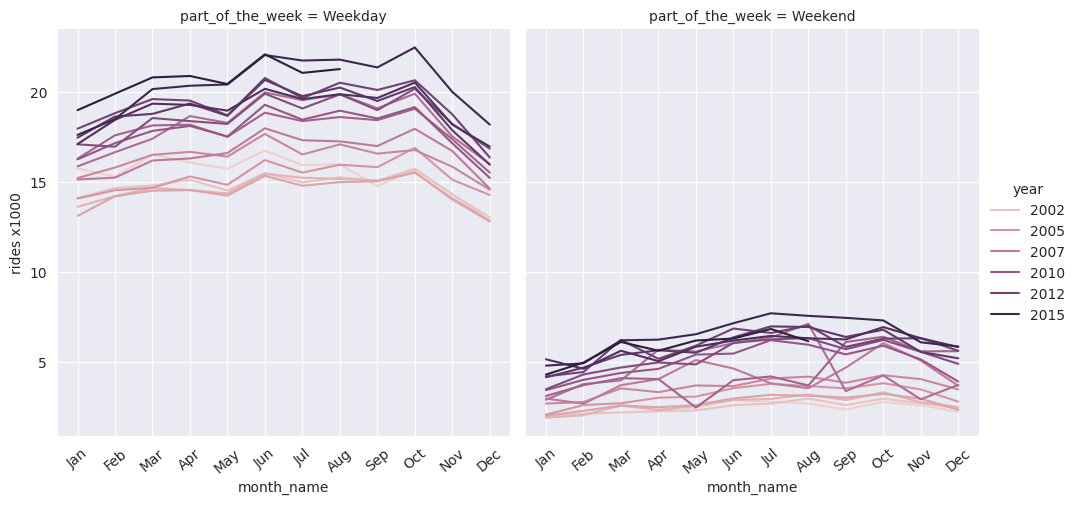

In [142]:
g = sns.relplot(data=line_data, x='month_name', y='rides x1000', kind='line', hue='year', col='part_of_the_week')
g.set_xticklabels(rotation=40)

In [134]:
import plotly.express as px

In [143]:
fig = px.line(data_frame=line_data, x='month_name', y='rides x1000',
              facet_col='part_of_the_week', color='year',
              color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_xaxes(tickangle=45)
fig.show()

Average weekly prices in Chicago have been recorded. We load the file and generate a line graph to see if there is any relationship with the number of passengers.

In [92]:
gas_price_df = pd.read_csv('data/chicago_gas_prices.csv',index_col=0, parse_dates=True)

In [93]:
gas_price_df = gas_price_df.sort_index()

In [94]:
gas_price_df

,gas_price
date,
2000-06-05,1.990
2000-06-12,2.134
2000-06-19,2.148
2000-06-26,2.029
2000-07-03,1.829
...,...
2017-06-12,2.526
2017-06-19,2.528
2017-06-26,2.441


In [102]:
gas_price_df['month_name'] = gas_price_df.index.month_name()
gas_price_df['year'] = gas_price_df.index.year
gas_price_df['part_of_the_week']=gas_price_df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')

Now let's see if there is any relationship between average gasoline prices and the number of passengers.

For this we calculate the monthly average of gasoline prices with a delay of 2 weeks and plot it against the geometric mean of the number of passengers at the Clark / Lake station.

In [103]:
line_plot_data_mean.loc[line_plot_data_mean.part_of_the_week=='Weekday', 'two_week_lag_gas_price'] = line_plot_gas_lagged['two_week_lag_gas_price']
line_plot_data_mean.loc[line_plot_data_mean.part_of_the_week=='Weekend', 'two_week_lag_gas_price'] = line_plot_gas_lagged['two_week_lag_gas_price']
line_plot_data_mean.head()

NameError: name 'line_plot_gas_lagged' is not defined

In [ ]:
line_plot_data_mean.year = line_plot_data_mean.year.astype(str) # we make it string so it is considered categorical variable

# Visualiation of categorical variables

## Uploading data to various pandas DataFrames


In [193]:
urls = ['https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['okc_train.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq
To: /content/data/okc_train.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 244MB/s]


In [194]:
df = pd.read_csv('data/okc_train.csv',index_col=0)

In [195]:
df.head()

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,...,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.420945,other,1
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,...,0,0,0,0,0,0,1,2.671173,other,3
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,...,0,0,0,0,0,0,1,3.391112,stem,5
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.090611,other,6
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.382377,other,7


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38809 entries, 1 to 59946
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               38809 non-null  int64  
 1   diet              38809 non-null  object 
 2   drinks            38809 non-null  object 
 3   drugs             38809 non-null  object 
 4   education         38809 non-null  object 
 5   height            38809 non-null  int64  
 6   income            38809 non-null  object 
 7   last_online       38809 non-null  int64  
 8   offspring         38809 non-null  object 
 9   pets              38809 non-null  object 
 10  religion          38809 non-null  object 
 11  sign              38809 non-null  object 
 12  smokes            38809 non-null  object 
 13  status            38809 non-null  object 
 14  where_state       38809 non-null  object 
 15  where_town        38809 non-null  object 
 16  religion_modifer  38809 non-null  object 
 17

In [168]:
df['drinks'].unique()

array(['socially', 'not_at_all', 'rarely', 'often', 'drinks_missing',
       'very_often', 'desperately'], dtype=object)

In [169]:
df['diet'].value_counts()

,count
diet,
diet_missing,14698
mostly_anything,11430
anything,4096
strictly_anything,3440
mostly_vegetarian,2313
mostly_other,700
strictly_vegetarian,588
vegetarian,448
strictly_other,304


<Axes: xlabel='drinks', ylabel='count'>

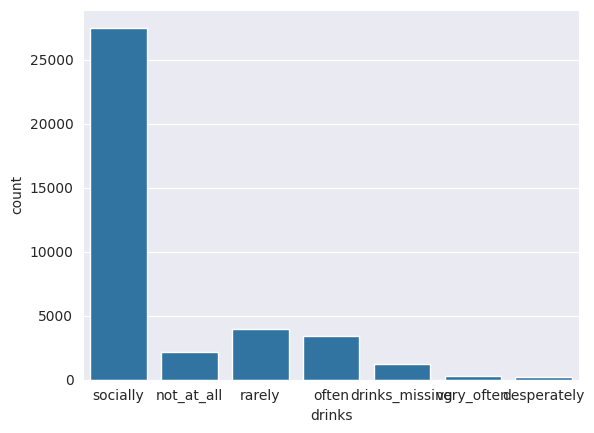

In [196]:
sns.countplot(data=df, x='drinks')

In [197]:
Class = df['Class'].value_counts()
Class

,count
Class,
other,31642
stem,7167


<Axes: xlabel='Class', ylabel='count'>

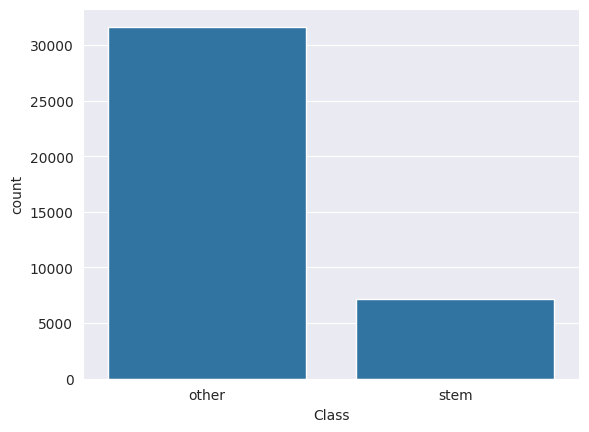

In [198]:
sns.countplot(data=df, x='Class')

## Bar chart

The bar chart is the most common way to present counts on categorical variables.

Let's use the category of religion for the first examples.

We create the dataset of the count of the two classes (i.e., stem and other) by value in the religion category

We present a bar graph partitioned and colored by the category of the target variable.

In [199]:
df['Classes'] = (df['Class']=='stem').astype(int)
df.head()

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,...,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile,Classes
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,1,3.420945,other,1,0
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,...,0,0,0,0,0,1,2.671173,other,3,0
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,...,0,0,0,0,0,1,3.391112,stem,5,1
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,1,3.090611,other,6,0
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,...,0,0,0,0,0,1,3.382377,other,7,0


<Axes: xlabel='Classes', ylabel='count'>

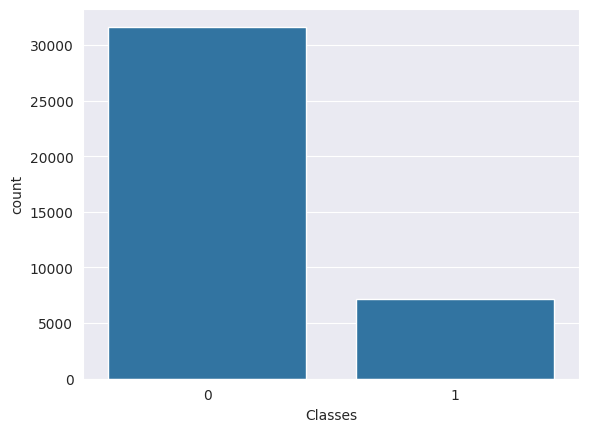

In [200]:
sns.countplot(data=df, x='Classes')

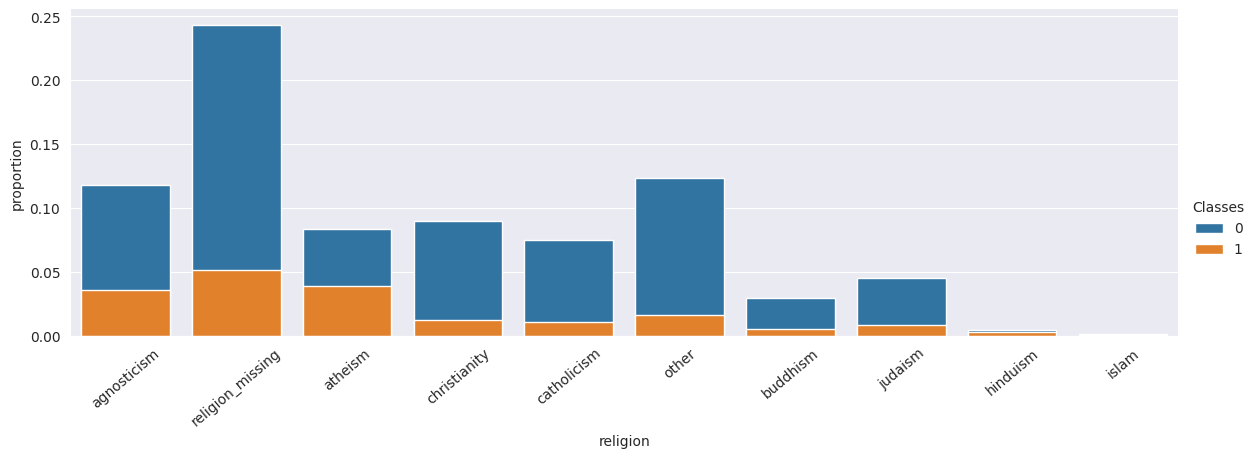

In [201]:
g = sns.catplot(data=df, x='religion', kind='count', hue='Classes',
                stat = 'proportion', dodge=False,
                height=4, aspect=3)
g.set_xticklabels(rotation=40)

In [202]:
bar_data = df.groupby(['religion', 'Class']).size().reset_index(name='counts')
bar_data.head(3)

,religion,Class,counts
0,agnosticism,other,4590
1,agnosticism,stem,1411
2,atheism,other,3251


In [205]:
px.bar(data_frame=bar_data,
       x='religion', y='counts',
       color='Class', barmode='group',
       color_discrete_sequence=px.colors.sequential.Blues_r,
       width=800, height=400)

In [207]:
c = df.groupby(['religion','Class']).size().rename("counts")
bar_percentage_data = (c / c.groupby(level=0).sum()).reset_index(name='proportion')

In [208]:
px.bar(data_frame=bar_percentage_data.sort_values(['Class','proportion'], ascending=[True,False]),
       x='religion', y='proportion',
       color='Class',  color_discrete_sequence=px.colors.sequential.Blues_r,
       width=800, height=400 )

## Exploring Relationships Between Categorical Predictors

In [209]:
from statsmodels.graphics.mosaicplot import mosaic

In [213]:
dd_df = df[['drinks', 'drugs']]
dd_df.head()

,drinks,drugs
1,socially,never
4,socially,drugs_missing
6,socially,drugs_missing
8,socially,never
10,not_at_all,never


In [214]:
def return_emtpy(x):
  return ''

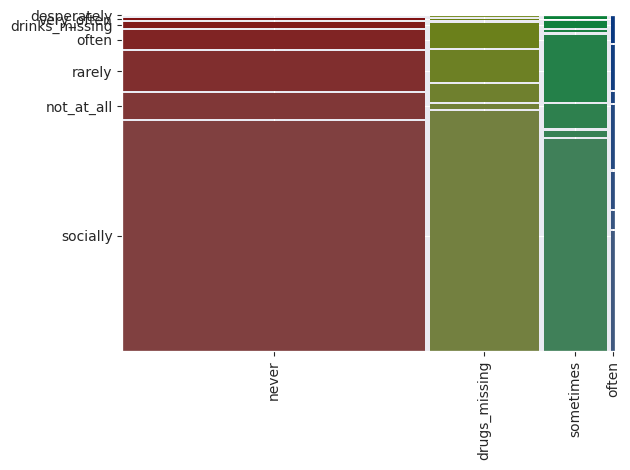

In [216]:
mosaic_fig = mosaic(dd_df, ['drugs', 'drinks'], labelizer=return_emtpy,
       label_rotation=[90,0], gap=0.01)
plt.tight_layout()